Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading the data

In [ ]:
#read data from local ,so need to upload files
'''
from google.colab import files
files.upload()
'''

In [ ]:
def load_data():
  #reading data from url
  url = "http://bit.ly/w-data"
  
  #to make its scope global
  global data
  data = pd.read_csv(url)
  print("Data imported successfully") 
  print(data.shape)
  print(data.head())
  

we can convert dataframe to csv

In [ ]:
data.to_csv("data.csv",index=False)


In [ ]:
load_data()

Data imported successfully
(25, 2)
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


Basic analysis

In [ ]:
def analysis():
  print(data.info())
  print(data.isnull().sum())
  print(data.describe())
  print(data.corr())
analysis()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
Hours     0
Scores    0
dtype: int64
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


Visualisation

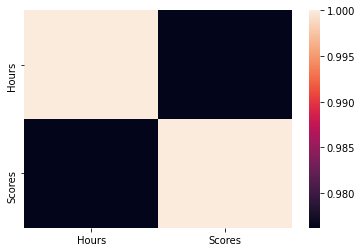

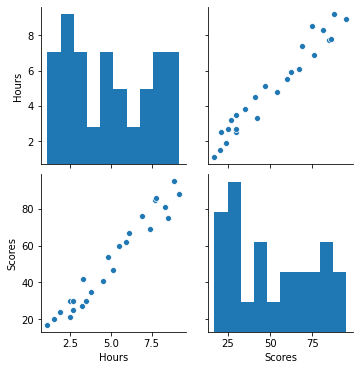

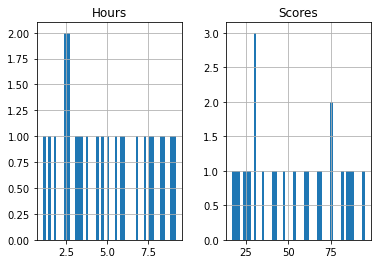

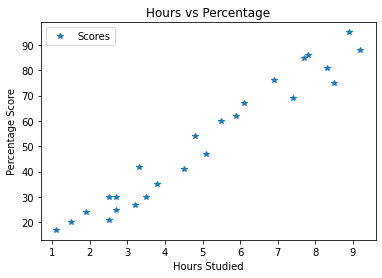

In [ ]:
def visual():
  sns.heatmap(data.corr())
  sns.pairplot(data)
  data.hist(bins=50)
  data.plot(x='Hours', y='Scores', style='*')  
  plt.title('Hours vs Percentage')  
  plt.xlabel('Hours Studied')  
  plt.ylabel('Percentage Score')  
  plt.show()
visual()

Preparing data

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

training

[9.91065648] is the coeff
2.018160041434662 is the intercept


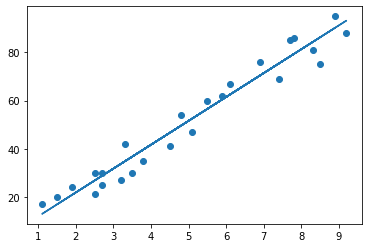

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
line = regressor.coef_*X+regressor.intercept_
print(regressor.coef_,'is the coeff')
print(regressor.intercept_,'is the intercept')

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()


Evualtion

In [ ]:
y_pred = regressor.predict(X_test)
y_predic=y_pred
from sklearn import metrics
print("Mean absolute error is",metrics.mean_absolute_error(y_test,y_predic))
print("Mean squared error is",metrics.mean_squared_error(y_test,y_predic))
print(" Root Mean square error is",np.sqrt(metrics.mean_absolute_error(y_test,y_predic)))

Mean absolute error is 4.183859899002982
Mean squared error is 21.598769307217456
 Root Mean square error is 2.0454485813637513


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


RESCALING IMPROVES ACCURACY

In [ ]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
sc_y = StandardScaler()
X=Sc.fit_transform(X)
y = np.array(y).reshape(-1,1)
y = sc_y.fit_transform(y)
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
line = regressor.coef_*X+regressor.intercept_
print(regressor.coef_,'is the coeff')
print(regressor.intercept_,'is the intercept')
y_pred = regressor.predict(X_test)
y_predic=y_pred
from sklearn import metrics
print("Mean absolute error is",metrics.mean_absolute_error(y_test,y_predic))
print("Mean squared error is",metrics.mean_squared_error(y_test,y_predic))
print(" Root Mean square error is",np.sqrt(metrics.mean_absolute_error(y_test,y_predic)))

[[0.98965679]] is the coeff
[0.0084909] is the intercept
Mean absolute error is 0.16886752752443157
Mean squared error is 0.03518576750268702
 Root Mean square error is 0.410934943177666


distribution of error terms

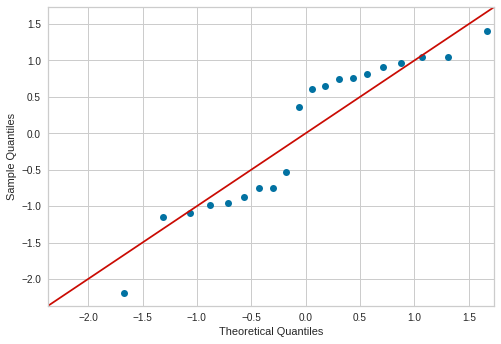

In [ ]:
import statsmodels.api as sm
m=sm.OLS(y_train,X_train).fit()
residual_val=m.resid
fig=sm.qqplot(residual_val,fit=True,line='45')
plt.show()

In [ ]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2111.
Date:                Sun, 06 Sep 2020   Prob (F-statistic):                    6.12e-21
Time:                        07:26:45   Log-Likelihood:                         -62.925
No. Observations:                  20   AIC:                                      127.8
Df Residuals:                      19   BIC:                                      128.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.2251      0.223     45.950      0.000       9.759      10.691
==============================================================================
Omnibus:                        2.581   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                1.529
Skew:                          -0.410   Prob(JB):                        0.466
Kurtosis:                       1.922   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
m.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.991   
Dependent Variable:     y                AIC:                         127.8500
Date:                   2020-09-06 07:27 BIC:                         128.8457
No. Observations:       20               Log-Likelihood:              -62.925 
Df Model:               1                F-statistic:                 2111.   
Df Residuals:           19               Prob (F-statistic):          6.12e-21
R-squared (uncentered): 0.991            Scale:                       33.312  
-----------------------------------------------------------------------------------
             Coef.       Std.Err.         t         P>|t|       [0.025       0.975]
-----------------------------------------------------------------------------------
x1          10.2251        0.2225      45.9497      0.0000      9.7593      10.6908
------------------------------------------------------------------------------
Omnibus:                  2.581             Durbin-Watson:               1.873
Prob(Omnibus):            0.275             Jarque-Bera (JB):            1.529
Skew:                     -0.410            Prob(JB):                    0.466
Kurtosis:                 1.922             Condition No.:               1    
==============================================================================

"""

Durbin-Watson:	1.873 which is near to 2 and so it is evident that residuals are not correlated

Residual plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Text(0.5, 1.0, 'Residual plot')

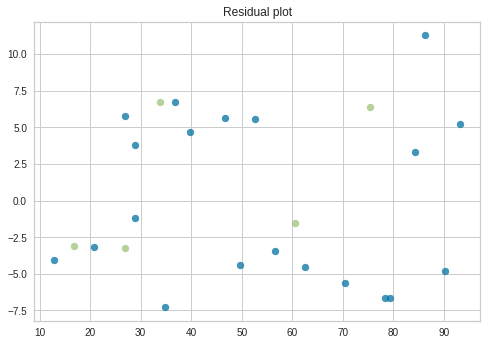

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.title("Residual plot")

0.9454906892105354

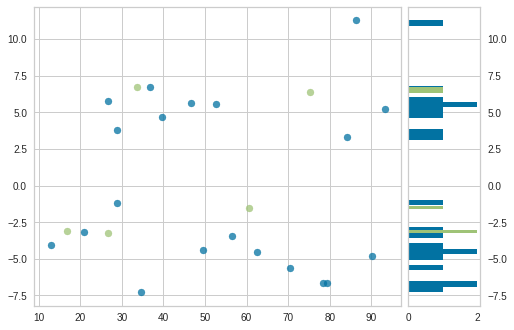

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)#result accuracy on test